### Geo data analysis

In [97]:
#Libraries
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import folium


Description of the AirBnb related data:
https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1938308660

Another approach for extracting points of interest -> using this article: 
https://www.urlaub-reise-tourismus.de/berlin-sehenswuerdigkeiten-a-z/

In [98]:
#Import all datasets

listings_raw_short = pd.read_csv("../data - AirBnb/listings.csv")
listings_raw = pd.read_csv("../data - AirBnb/listings.csv.gz", compression='gzip')

calendar_raw = pd.read_csv("../data - AirBnb/calendar.csv.gz")

reviews_raw_short = pd.read_csv("../data - AirBnb/reviews.csv")
reviews_raw = pd.read_csv("../data - AirBnb/reviews.csv.gz", compression='gzip')

poi2_raw = pd.read_csv("../data - Tourpedia/berlin-poi2.csv")

In [99]:
listings_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

#### Data Cleaning

In [100]:
#Lets create a listings datasets that we will work with

listings = listings_raw [['id', 'listing_url', 'name',
       'host_id', 'host_since', 'host_acceptance_rate', 'host_is_superhost', 'calculated_host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 
       'property_type', 'room_type', 'accommodates', 'price',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
       'has_availability',  'availability_365', 
       'number_of_reviews', 'number_of_reviews_ltm', 'last_review', 'reviews_per_month']]

listings.columns = ['id', 'listing_url', 'name',
       'host_id', 'host_since', 'host_acceptance_rate', 'host_is_superhost', 'calculated_host_listings_count',
       'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 
       'property_type', 'room_type', 'accommodates', 'price',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
       'has_availability',  'availability_365', 
       'number_of_reviews', 'number_of_reviews_ltm', 'last_review', 'reviews_per_month']

pd.set_option('display.max_columns', None)
listings.head()


,id,listing_url,name,host_id,host_since,host_acceptance_rate,host_is_superhost,calculated_host_listings_count,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,2008-10-19,17%,f,1,Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,$83.00,63.0,184.0,t,15,148,1,2023-05-25,0.84
1,9991,https://www.airbnb.com/rooms/9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,2009-08-25,NaN,f,1,Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,$180.00,6.0,14.0,t,47,7,0,2020-01-04,0.07
2,183988,https://www.airbnb.com/rooms/183988,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,882801,2011-07-28,99%,f,1,Neue Kantstraße,Charlottenburg-Wilm.,52.50001,13.30349,Entire rental unit,Entire home/apt,4,$116.00,2.0,365.0,t,336,570,50,2023-11-26,3.92
3,14325,https://www.airbnb.com/rooms/14325,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,55531,2009-11-18,47%,f,4,Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1,$70.00,150.0,1125.0,t,107,26,1,2023-11-30,0.16
4,186663,https://www.airbnb.com/rooms/186663,Rental unit in Berlin · ★4.40 · 1 bedroom · 2 ...,897302,2011-07-31,100%,f,4,Zehlendorf Nord,Steglitz - Zehlendorf,52.43430,13.23037,Entire rental unit,Entire home/apt,2,$100.00,183.0,730.0,t,364,15,0,2016-05-16,0.11


In [101]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13327 entries, 0 to 13326
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13327 non-null  int64  
 1   listing_url                     13327 non-null  object 
 2   name                            13327 non-null  object 
 3   host_id                         13327 non-null  int64  
 4   host_since                      13318 non-null  object 
 5   host_acceptance_rate            9021 non-null   object 
 6   host_is_superhost               13285 non-null  object 
 7   calculated_host_listings_count  13327 non-null  int64  
 8   neighbourhood                   13327 non-null  object 
 9   neighbourhood_group             13327 non-null  object 
 10  latitude                        13327 non-null  float64
 11  longitude                       13327 non-null  float64
 12  property_type                   

In [102]:
listings_raw.shape

(13327, 75)

In [103]:
listings.shape

(13327, 24)

In [104]:
listings.isna().sum()

id                                   0
listing_url                          0
name                                 0
host_id                              0
host_since                           9
host_acceptance_rate              4306
host_is_superhost                   42
calculated_host_listings_count       0
neighbourhood                        0
neighbourhood_group                  0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
price                             3953
minimum_nights_avg_ntm               1
maximum_nights_avg_ntm               1
has_availability                  3953
availability_365                     0
number_of_reviews                    0
number_of_reviews_ltm                0
last_review                       3000
reviews_per_month                 3000
dtype: int64

Now we need to do some data cleaning. 
Firstly, we will convert variables to their expected datatypes.

In [105]:
listings.head()

,id,listing_url,name,host_id,host_since,host_acceptance_rate,host_is_superhost,calculated_host_listings_count,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,2008-10-19,17%,f,1,Prenzlauer Berg Südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,4,$83.00,63.0,184.0,t,15,148,1,2023-05-25,0.84
1,9991,https://www.airbnb.com/rooms/9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,2009-08-25,NaN,f,1,Prenzlauer Berg Südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,7,$180.00,6.0,14.0,t,47,7,0,2020-01-04,0.07
2,183988,https://www.airbnb.com/rooms/183988,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,882801,2011-07-28,99%,f,1,Neue Kantstraße,Charlottenburg-Wilm.,52.50001,13.30349,Entire rental unit,Entire home/apt,4,$116.00,2.0,365.0,t,336,570,50,2023-11-26,3.92
3,14325,https://www.airbnb.com/rooms/14325,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,55531,2009-11-18,47%,f,4,Prenzlauer Berg Nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1,$70.00,150.0,1125.0,t,107,26,1,2023-11-30,0.16
4,186663,https://www.airbnb.com/rooms/186663,Rental unit in Berlin · ★4.40 · 1 bedroom · 2 ...,897302,2011-07-31,100%,f,4,Zehlendorf Nord,Steglitz - Zehlendorf,52.43430,13.23037,Entire rental unit,Entire home/apt,2,$100.00,183.0,730.0,t,364,15,0,2016-05-16,0.11


In [106]:
#Price
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

#Categorical variables
listings[['neighbourhood', 'neighbourhood_group', 'property_type', 'room_type']] = listings[['neighbourhood', 'neighbourhood_group', 'property_type', 'room_type']].astype("category")

#Acceptance rate
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

#Binary
listings['host_is_superhost'] = np.where(listings['host_is_superhost'] == 't', 1, 0)
listings['has_availability'] = np.where(listings['has_availability'] == 't', 1 , 0)

#Property type - create new column 
listings['isHotel'] = ((listings['property_type'].str.contains('hotel|hostel|guesthouse|breakfast', case=False, regex=True)) | (listings['room_type'] == 'Hotel room')).astype(int)

#Ownership
def conditions(i): 
    if i == 1: return '1'
    if i == 2: return '2'
    if i == 3: return '3'
    if i > 3: return '3+'

listings['calculated_host_listings_count_cat']=listings['calculated_host_listings_count'].apply(conditions)




<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_5657/3226786140.py:2: SyntaxWarning: invalid escape sequence '\$'
  listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipykernel_5657/3226786140.py:8: SyntaxWarning: invalid escape sequence '\%'
  listings['host_acceptance_rate'] = listings['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)
/tmp/ipykernel_5657/3226786140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipykernel_5657/32

In [107]:
listings.describe()

,id,host_id,host_acceptance_rate,host_is_superhost,calculated_host_listings_count,latitude,longitude,accommodates,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,reviews_per_month,isHotel
count,1.332700e+04,1.332700e+04,9021.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,9374.000000,13326.000000,1.332600e+04,13327.000000,13327.000000,13327.000000,13327.000000,10327.000000,13327.000000
mean,2.726391e+17,1.481982e+08,81.236448,0.198769,9.276131,52.509764,13.402477,2.934794,124.517068,47.545392,1.128774e+06,0.700683,120.597809,37.285210,9.102649,1.152360,0.053726
std,4.000348e+17,1.686400e+08,27.469206,0.399089,31.789247,0.033481,0.066762,1.864588,383.751953,67.192805,4.920747e+07,0.457976,135.093951,82.934263,20.630024,1.820554,0.225484
min,3.176000e+03,1.581000e+03,0.000000,0.000000,1.000000,52.369040,13.107580,1.000000,9.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,1.723423e+07,1.362112e+07,71.000000,0.000000,1.000000,52.490371,13.364285,2.000000,62.000000,2.000000,3.650000e+02,0.000000,0.000000,1.000000,0.000000,0.130000,0.000000
50%,3.916137e+07,6.108240e+07,96.000000,0.000000,1.000000,52.509630,13.411440,2.000000,91.000000,6.800000,1.125000e+03,1.000000,58.000000,7.000000,1.000000,0.510000,0.000000
75%,6.968867e+17,2.577263e+08,100.000000,0.000000,3.000000,52.532395,13.438163,4.000000,139.000000,92.000000,1.125000e+03,1.000000,257.000000,33.000000,10.000000,1.580000,0.000000
max,1.049081e+18,5.510794e+08,100.000000,1.000000,231.000000,52.656110,13.721390,16.000000,24999.000000,1100.000000,2.147484e+09,1.000000,365.000000,2363.000000,716.000000,56.730000,1.000000


In [108]:
#Price
listings = listings[listings.price < 3000] #exclude listings with too high price & NAN price

In [109]:
listings.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_since',
       'host_acceptance_rate', 'host_is_superhost',
       'calculated_host_listings_count', 'neighbourhood',
       'neighbourhood_group', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'price', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'last_review',
       'reviews_per_month', 'isHotel', 'calculated_host_listings_count_cat'],
      dtype='object')

#### Basic exploratory analysis

In [110]:
#Create a map of Berlin districts 

df2 = listings[['longitude', 'latitude', 'name', 'price']]
berlin_map = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=12)

belin_boroughs = "../data - AirBnb/neighbourhoods.geojson"
#berlin_price = listings.groupby(by="neighbourhood_group").median().reset_index()

'''folium.Choropleth(
    geo_data=belin_boroughs,
    name='choropleth',
    columns='neighbourhood_group',
    key_on='feature.properties.name',
    fill_color='RdBu_r',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(berlin_map)

folium.LayerControl().add_to(berlin_map)

'''

folium.GeoJson(belin_boroughs, name='geojson').add_to(berlin_map)


berlin_map

##### Property types

Main questions of the section
1. Percentage of "hotels" and "shared economy properties" listed on airbnb?
2. Are properties of different types distributed evenly around the city?
3. Are there any differences in location patterns for hotels and airbnbs?

In [111]:
#% of hotels listings on AirBnb
listings[listings['isHotel'] == 1]['id'].count()*100/ listings['id'].count()

7.51334044823906

7,5% of all listings in our dataset are related to hotels/hostels. Let's now see how hotels vs flats are distributed around the city and POIs. 

In [112]:
#% of non-shared property among all listings not related to hotels
listings[(listings['isHotel'] == 0) & (listings['room_type'] == 'Entire home/apt')]['id'].count()*100 / listings[listings['isHotel'] == 0]['id'].count()

74.98269097622894

In [113]:
#% of non-shared property among all listings 
listings[listings['room_type'] == 'Entire home/apt']['id'].count()*100/ listings['id'].count()

70.33084311632871

In [114]:
#Non-hotels
ngf = listings[listings['isHotel'] == 0]['neighbourhood_group'].value_counts().reset_index()
ngf.columns = ['neighbourhood_group', 'count']
ngf['percent'] = ngf['count']/ngf['count'].sum() * 100


#Hotels
ngh = listings[listings['isHotel'] == 1]['neighbourhood_group'].value_counts().reset_index()
ngh.columns = ['neighbourhood_group', 'count']
ngh['percent'] = ngh['count']/ngh['count'].sum() * 100

In [115]:
#Districts where most hotels are located
ngh

,neighbourhood_group,count,percent
0,Mitte,186,26.420455
1,Friedrichshain-Kreuzberg,124,17.613636
2,Charlottenburg-Wilm.,108,15.340909
3,Pankow,105,14.914773
4,Tempelhof - Schöneberg,69,9.801136
5,Treptow - Köpenick,33,4.687500
6,Neukölln,29,4.119318
7,Lichtenberg,17,2.414773
8,Reinickendorf,14,1.988636
9,Spandau,11,1.562500


In [116]:
#Districts where most flats are located
ngf

,neighbourhood_group,count,percent
0,Mitte,1931,22.282483
1,Friedrichshain-Kreuzberg,1834,21.163166
2,Pankow,1414,16.316640
3,Charlottenburg-Wilm.,912,10.523886
4,Neukölln,772,8.908378
5,Tempelhof - Schöneberg,582,6.715901
6,Treptow - Köpenick,377,4.350335
7,Steglitz - Zehlendorf,257,2.965613
8,Lichtenberg,218,2.515578
9,Reinickendorf,144,1.661666


We see that according to 2 dataframes Airbnb listings that are related to hotels tend to concentrate in slightly different neighbourhoods. Let's extend our hotels dataset with some external data and see if hotels and flats are indeed tend to form different clasters.

In [117]:
#Import external information about hotels
hotels = pd.read_csv('../data - Tourpedia/berlin-accommodation_v2.csv', sep = ';')


In [118]:
#Create heatmaps for hotels and flats
from folium.plugins import HeatMap

df1 = poi2_raw
df2 = listings[listings['isHotel']==0][['longitude', 'latitude', 'name', 'price']]
df3 = hotels[['lng', 'lat', 'name']]

m0 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=12)

gradient2 = {.2: 'blue', .7: 'lightblue', 1: 'darkblue'}
m0.add_child(HeatMap(df2[['latitude', 'longitude']].values, radius=15, gradient=gradient2, min_opacity=0.25, blur = 10))

gradient3 = {.2: 'red', .7: 'brown', 1: 'yellow'}
m0.add_child(HeatMap(df3[['lat', 'lng']].values, radius=12, gradient=gradient3, min_opacity=0.2))

# POIs

for index, row in df1.iterrows():
    folium.Circle(
        location=[row['lat'], row['lng']],
        popup=row['name'],  # You can customize the popup content
        radius=30, 
        fill_color="lime", 
        fill_opacity=0.5, 
        color="lime"
      
    ).add_to(m0)

m0

According to the map above, we see that hotels (redish colors) tend to group in western part of the city while AirBnb flats (blueish colors) tend to form clasters in eastern part of the city. Therefore, we can say that presense of AirBnb helps to include additional districts of the city in the tourism-related economy. 

Now let's compare room types of listings that are not related to hotels.
We can see that 'Entire home/apt' stays the most popular category among all districts however the percentage of other categories tend to grow in some districts.

In [119]:
ngrt = listings[listings['isHotel']==0][['neighbourhood_group', 'room_type']]
ngrt_crosstab = pd.crosstab(ngrt.neighbourhood_group, ngrt.room_type)
ngrt_crosstab = ngrt_crosstab.sort_values(by = 'Entire home/apt', ascending = False)
ngrt_crosstab

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Mitte,1613,298,20
Friedrichshain-Kreuzberg,1303,525,6
Pankow,1096,312,6
Charlottenburg-Wilm.,693,214,5
Neukölln,526,243,3
Tempelhof - Schöneberg,454,127,1
Treptow - Köpenick,284,90,3
Steglitz - Zehlendorf,177,76,4
Lichtenberg,150,64,4


In [120]:
ngrt_percentages = ngrt_crosstab.div(ngrt_crosstab.sum(axis=1), axis=0) * 100
ngrt_percentages = ngrt_percentages.sort_values(by='Entire home/apt', ascending=False)
ngrt_percentages

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Mitte,83.531849,15.432418,1.035733
Tempelhof - Schöneberg,78.006873,21.821306,0.171821
Pankow,77.510608,22.065064,0.424328
Charlottenburg-Wilm.,75.986842,23.464912,0.548246
Treptow - Köpenick,75.331565,23.872679,0.795756
Friedrichshain-Kreuzberg,71.046892,28.625954,0.327154
Steglitz - Zehlendorf,68.871595,29.571984,1.556420
Lichtenberg,68.807339,29.357798,1.834862
Neukölln,68.134715,31.476684,0.388601


In [121]:
#Create heatmaps for hotels and flats
from folium.plugins import HeatMap

df1 = poi2_raw
df2 = listings[listings['room_type']=='Entire home/apt'][['longitude', 'latitude', 'name', 'price']]
df3 = listings[(listings['room_type']=='Private room') | (listings['room_type']=='Shared room')][['longitude', 'latitude', 'name', 'price']]

m1 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=12)

gradient2 = {.2: 'blue', .66: 'lightblue', 1: 'darkblue'}
m1.add_child(HeatMap(df3[['latitude', 'longitude']].values, radius=15, gradient=gradient2, min_opacity=0.25, blur = 10))

gradient3 = {.2: 'red', .66: 'brown', 1: 'yellow'}
m1.add_child(HeatMap(df2[['latitude', 'longitude']].values, radius=12, gradient=gradient3, min_opacity=0.2))

# POIs

for index, row in df1.iterrows():
    folium.Circle(
        location=[row['lat'], row['lng']],
        popup=row['name'],  # You can customize the popup content
        radius=30, 
        fill_color="lime", 
        fill_opacity=0.5, 
        color="lime"
      
    ).add_to(m1)

m1

On the map above we can see that category "Entire home/apartment" (blueish colours) tend to form clusetrs in other locations compared to "Shared room/flat" properties. Also, according to the calculations above, we can notice that % of shared properties significantly higher for some districts. Moreover, in Spandau % of property type "shared room" is too high compared to other districts, therefore, we can probably assume that there is a hostel (or another commertial property) that is located there and all postings belong to one owner. 

We can conclude that:
1. "Hotels" and "Flats" tend to form clusters in different districts of the city. However, both types of accomodation are located close to the city center and POIs.
2. "Shared rooms" and "Entire properties" also tend to be distributed unevenly around the city.

#### Ownership

Now, let's explore ownership structure of listings. Main questions of the section:
1. Who own properties of different types?

In [122]:
#### Ownership
os = listings[listings['isHotel']==0][['room_type', 'calculated_host_listings_count_cat']]
os_crosstab = pd.crosstab(os.calculated_host_listings_count_cat, os.room_type)
# os_crosstab = os_crosstab.sort_values(by = '1', ascending = False)
os_crosstab

room_type,Entire home/apt,Private room,Shared room
calculated_host_listings_count_cat,,,
1,3257,1247,17
2,696,366,1
3,351,117,2
3+,2194,356,62


In [123]:
listings.shape

(9370, 26)

In [124]:
os = listings[listings['isHotel']==0][['room_type', 'calculated_host_listings_count_cat']]

os.groupby('calculated_host_listings_count_cat')['room_type'].count()

calculated_host_listings_count_cat
1     4521
2     1063
3      470
3+    2612
Name: room_type, dtype: int64

In [125]:
os_percentages = os_crosstab.div(os_crosstab.sum(axis=1), axis=0) * 100
# os_percentages = os_percentages.sort_values(by=1, ascending=False)
os_percentages

room_type,Entire home/apt,Private room,Shared room
calculated_host_listings_count_cat,,,
1,72.041584,27.582393,0.376023
2,65.475071,34.430856,0.094073
3,74.680851,24.893617,0.425532
3+,83.996937,13.629403,2.373660


Before calculating ownership structure we excluded all listings that can be identified as hotels. For other listings we can assume that they were posted by privat users (and not commercial accounts). However, we can see that even for the property type "entire house" % of people who rents another 3+ listings is quite high meaning that high % of airbnb users actually consider renting properties through airbnb as some kind of business.

#### Prices

Of course for many users price is considered to be one of the most important criterias when chossing a place to stay. Here we want to compare price distribution for different property types and districts of the city.

/tmp/ipykernel_5657/2171075716.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(listings.price, shade=True, clip=(0, 500))
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Berlin AirBnB Price distribution')

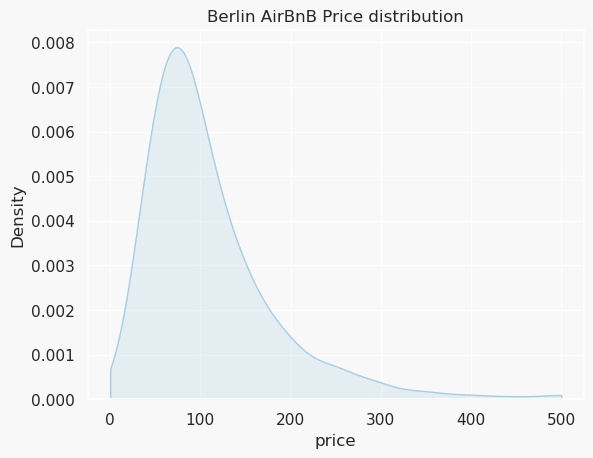

In [126]:
#Now lots plot prices distribution
sns.kdeplot(listings.price, shade=True, clip=(0, 500))
plt.title("Berlin AirBnB Price distribution")

In [127]:
df = listings[listings['isHotel']==0][['room_type', 'price', 'neighbourhood_group']]

df.groupby('neighbourhood_group')['price'].mean().sort_values()

/tmp/ipykernel_5657/666411294.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('neighbourhood_group')['price'].mean().sort_values()


neighbourhood_group
Spandau                      76.076336
Reinickendorf                78.520833
Marzahn - Hellersdorf        80.489362
Lichtenberg                 102.059633
Neukölln                    103.045337
Tempelhof - Schöneberg      105.721649
Steglitz - Zehlendorf       106.058366
Treptow - Köpenick          110.302387
Charlottenburg-Wilm.        111.369518
Friedrichshain-Kreuzberg    115.902944
Pankow                      119.169024
Mitte                       142.393061
Name: price, dtype: float64

/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

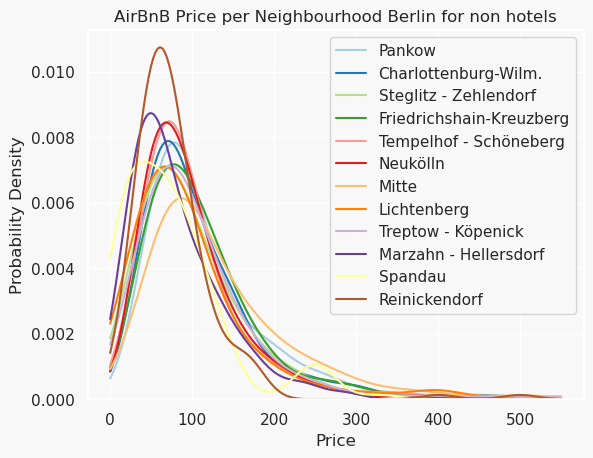

In [128]:
df = listings[listings['isHotel']==0][['room_type', 'price', 'neighbourhood_group']]

for hood in df.neighbourhood_group.unique():
    sns.kdeplot(df[df.neighbourhood_group==hood].price, fill=False, clip=(0, 550), label = hood)

  
plt.xlabel('Price') 
plt.ylabel('Probability Density') 
plt.title('AirBnB Price per Neighbourhood Berlin for non hotels')
plt.legend()

/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

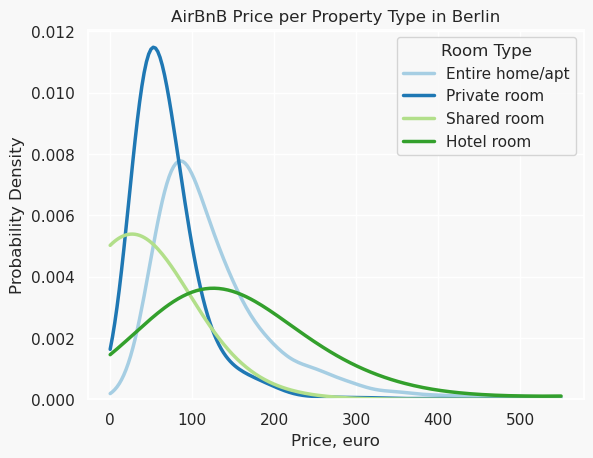

In [129]:

# Set a seaborn style
#sns.set(style="white", palette="Paired", color_codes=True)
sns.set (palette = "Paired", rc={'axes.facecolor':'#f8f8f8ff', 'figure.facecolor':'#f8f8f8ff'})


# Create a figure and axis
#plt.figure(figsize=(1, 8))

# Plot KDE for each room type
for rt in listings.room_type.unique():
    sns.kdeplot(
        listings[listings.room_type == rt].price,
        fill=False,
        clip=(0, 550),
        label=rt,
        linewidth=2.5,  # Adjust the line width
        linestyle='-'  # Solid line style
    
    )


# Set labels and title
plt.xlabel('Price, euro')
plt.ylabel('Probability Density')
plt.title('AirBnB Price per Property Type in Berlin')

# Add legend with a title
plt.legend(title='Room Type', loc='upper right')

# Show the plot
plt.show()


/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

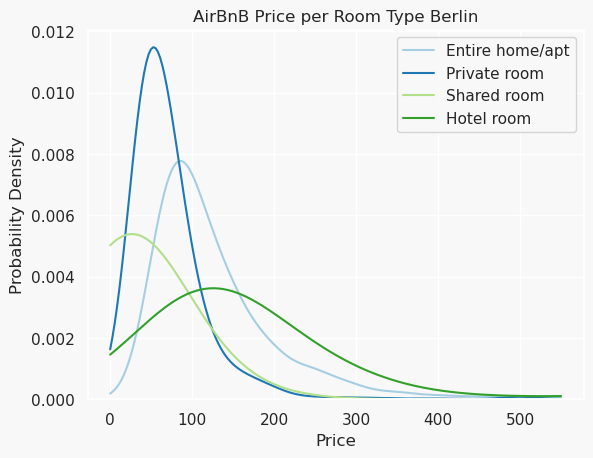

In [130]:
#Prices per property type

for rt in listings.room_type.unique():
    sns.kdeplot(listings[listings.room_type==rt].price, fill=False, clip=(0, 550), label = rt)

  
plt.xlabel('Price') 
plt.ylabel('Probability Density') 
plt.title('AirBnB Price per Room Type Berlin')
plt.legend()

# Autocorrelation analysis of Berlin by number of airbnbs and hotels/neighborhood

In [131]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lp
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

## Read csv, preprocess and merge dataframes

In [132]:
airbnb_listings = pd.read_csv(
    "../data - AirBnb/listings.csv.gz", compression='gzip', on_bad_lines='skip')
neighbourhoods_gdf = gpd.read_file(
    "../data - AirBnb/neighbourhoods.geojson"
)

# convert price to float
airbnb_listings['price'] = airbnb_listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

# filter out outliers
airbnb_listings = airbnb_listings[airbnb_listings['price'] < 1000]

median = airbnb_listings['price'].median()

# use only 'neighbourhood_cleansed'
airbnb_listings['neighbourhood'] = airbnb_listings['neighbourhood_cleansed']

In [133]:
hotels_df = pd.read_csv('../data - Tourpedia/berlin-accommodation_v2.csv', sep = ';')

# assign hotels to neighbourhoods based on coordinates
geometry = [Point(xy) for xy in zip(hotels_df['lng'], hotels_df['lat'])]
crs = {'init': 'epsg:4326'}
geo_df = GeoDataFrame(hotels_df, crs=crs, geometry=geometry)
neighbourhoods_gdf['hotel_count'] = 0

for idx, poly in neighbourhoods_gdf.iterrows():
    count = geo_df.within(poly['geometry']).sum()
    neighbourhoods_gdf.at[idx, 'hotel_count'] = count

/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [134]:
airbnb_listings = airbnb_listings.groupby('neighbourhood').count()[['id']]
airbnb_listings['airbnb_count'] = airbnb_listings['id']

In [135]:
neighbourhoods_gdf.set_index('neighbourhood', inplace=True)
neighbourhoods_gdf = neighbourhoods_gdf.merge(airbnb_listings, left_index=True, right_index=True)

In [136]:
neighbourhoods_gdf.head()

,neighbourhood_group,geometry,hotel_count,id,airbnb_count
neighbourhood,,,,,
Adlershof,Treptow - Köpenick,"MULTIPOLYGON (((13.55429 52.42581, 13.55424 52...",3,37,37
Albrechtstr.,Steglitz - Zehlendorf,"MULTIPOLYGON (((13.32681 52.46139, 13.32700 52...",3,50,50
Alexanderplatz,Mitte,"MULTIPOLYGON (((13.40559 52.52967, 13.40721 52...",29,725,725
Allende-Viertel,Treptow - Köpenick,"MULTIPOLYGON (((13.58666 52.44096, 13.58587 52...",0,2,2
Alt Treptow,Treptow - Köpenick,"MULTIPOLYGON (((13.43966 52.48991, 13.43967 52...",1,53,53


## Different Visualizations of the distribution of airbnb's and hotels per neighborhood

<Axes: title={'center': 'Airbnb listings per neighbourhood'}>

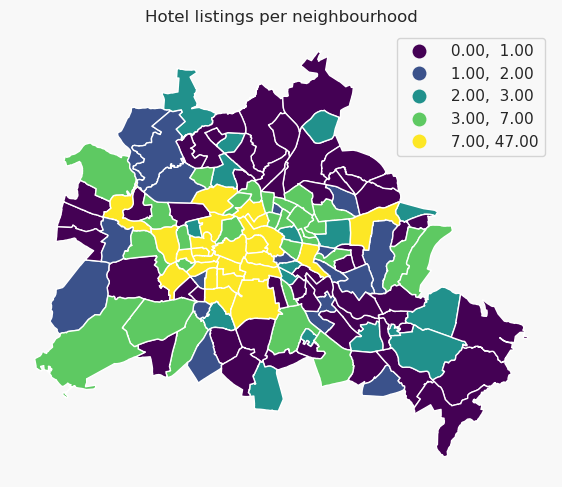

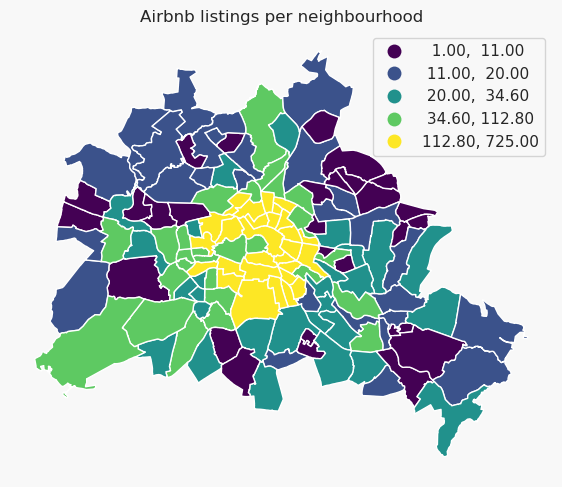

In [137]:

f, ax = plt.subplots(1, figsize=(7, 7))
ax.set_title('Hotel listings per neighbourhood')
ax.set_axis_off()
neighbourhoods_gdf.plot(column='hotel_count', legend=True, figsize=(7, 7), scheme='quantiles', ax=ax)

f, ax = plt.subplots(1, figsize=(7, 7))
ax.set_title('Airbnb listings per neighbourhood')
ax.set_axis_off()
neighbourhoods_gdf.plot(column='airbnb_count', legend=True, figsize=(7, 7), scheme='quantiles',  ax=ax)

Above we see the distribution of hotels as well as airbnbs across berlin.

## Autocorrelation analysis steps

### Calculating closest neighbour weights

In [138]:
# convert multi-polygons to polygons. Luckily, for this dataset, all of the multi polygons contain just one polygon
neighbourhoods_gdf['geometry'] = neighbourhoods_gdf['geometry'].apply(lambda x: x.geoms[0])

wq =  lp.weights.Queen.from_dataframe(neighbourhoods_gdf)
wq.transform = 'r'


/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/libpysal/weights/_contW_lists.py:23: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if shape.type.lower() == "polygon":
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/libpysal/weights/_contW_lists.py:26: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "linestring":


### Calculating Spatial Lag

In [139]:
y_airbnb = neighbourhoods_gdf['airbnb_count']
ylag_aribnb = lp.weights.lag_spatial(wq, y_airbnb)

y_hotel = neighbourhoods_gdf['hotel_count']
ylag_hotel = lp.weights.lag_spatial(wq, y_airbnb)


In [140]:
import mapclassify as mc
ylagq5_airbnb = mc.Quantiles(ylag_aribnb, k=5)
ylagq5_hotel = mc.Quantiles(ylag_hotel, k=5)

In [141]:
yb_airbnb = y_airbnb > y_airbnb.median()
yb_hotel = y_hotel > y_hotel.median()

In [142]:
# yb_airbnb = y_airbnb > y_airbnb.median()
# labels_airbnb = ["0 Low", "1 High"]
# yb_airbnb = [labels_airbnb[i] for i in 1*yb_airbnb] 
# neighbourhoods_gdf['yb_airbnb'] = yb_airbnb

# yb_hotel = y_airbnb > y_airbnb.median()
# labels_airbnb = ["0 Low", "1 High"]
# yb_hotel = [labels_airbnb[i] for i in 1*yb_hotel] 
# neighbourhoods_gdf['yb_hotel'] = yb_hotel

In [143]:
wq.transform = 'r'
lag_price_airbnb = lp.weights.lag_spatial(wq, neighbourhoods_gdf['airbnb_count'])
lag_price_hotel = lp.weights.lag_spatial(wq, neighbourhoods_gdf['hotel_count'])

In [144]:
li_airbnb = esda.moran.Moran_Local(y_airbnb, wq)
li_hotel = esda.moran.Moran_Local(y_hotel, wq)


### Hot/Cold spots based on 5% significance

In [145]:
sig_airbnb = li_airbnb.p_sim < 0.05
sig_hotel = li_hotel.p_sim < 0.05

hotspot_airbnb = sig_airbnb * li_airbnb.q==1
coldspot_airbnb = sig_airbnb * li_airbnb.q==3

hotspot_hotel = sig_hotel * li_hotel.q==1
coldspot_hotel = sig_hotel * li_hotel.q==3


In [146]:
spots = ['n.sig.', 'hot spot']
labels_airbnb = [spots[i] for i in hotspot_airbnb*1]
labels_hotel = [spots[i] for i in hotspot_hotel*1]


## Hot Spots and cold spots visualized

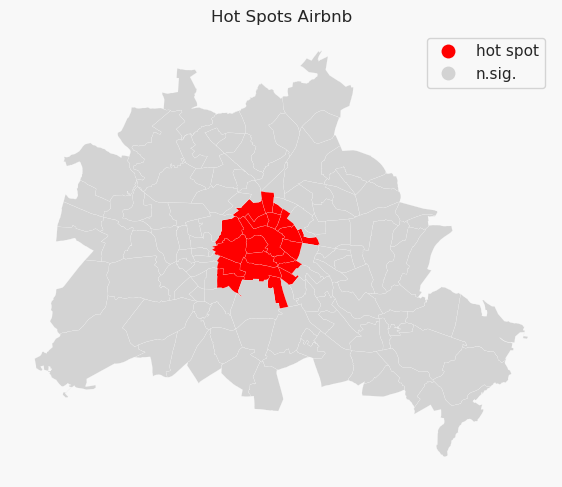

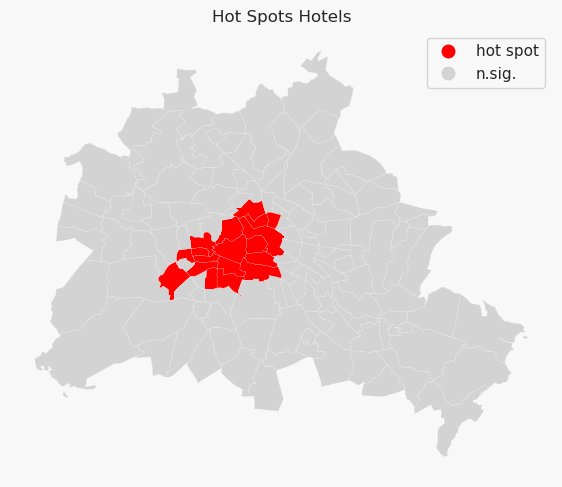

In [147]:
from matplotlib import colors

for labels in [labels_airbnb, labels_hotel]:
        neighbourhoods_gdf = neighbourhoods_gdf
        hmap = colors.ListedColormap(['red', 'lightgrey'])
        f, ax = plt.subplots(1, figsize=(7, 7))
        ax.set_title("Hot Spots " + ("Airbnb" if labels == labels_airbnb else "Hotels"))
        neighbourhoods_gdf.assign(cl=labels).plot(column='cl', categorical=True, 
                k=2, cmap=hmap, linewidth=0.1, ax=ax, 
                edgecolor='white', legend=True)
        ax.set_axis_off()
        plt.show()


In [148]:
spots = ['n.sig.', 'cold spot']
labels_airbnb = [spots[i] for i in coldspot_airbnb*1]
labels_hotel = [spots[i] for i in coldspot_hotel*1]


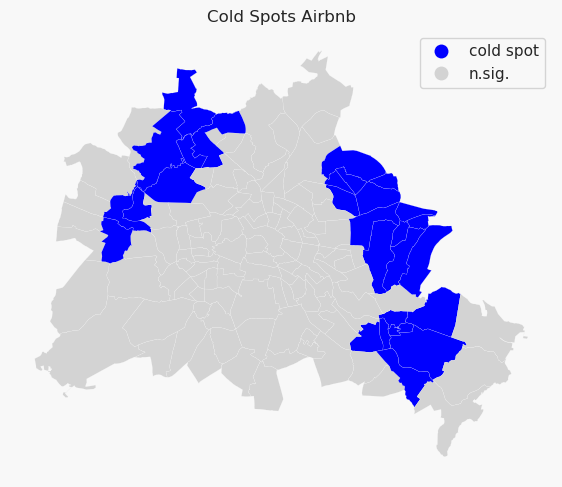

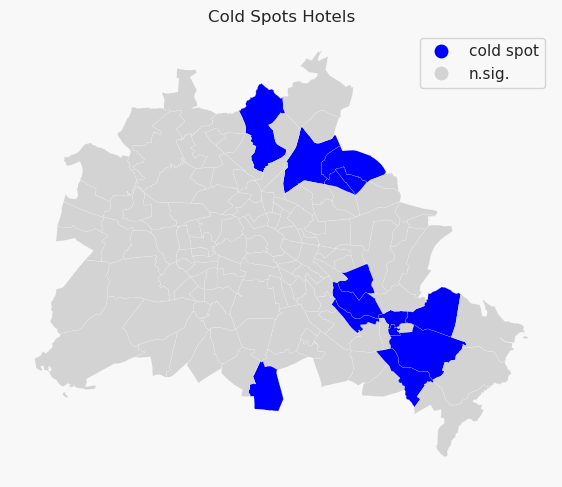

In [149]:
for labels in [labels_airbnb, labels_hotel]:
        neighbourhoods_gdf = neighbourhoods_gdf
        hmap = colors.ListedColormap(['blue', 'lightgrey'])
        f, ax = plt.subplots(1, figsize=(7, 7))
        ax.set_title("Cold Spots " + ("Airbnb" if labels == labels_airbnb else "Hotels"))
        neighbourhoods_gdf.assign(cl=labels).plot(column='cl', categorical=True, 
                k=2, cmap=hmap, linewidth=0.1, ax=ax, 
                edgecolor='white', legend=True)
        ax.set_axis_off()
        plt.show()


## Airbnp impact on Socio

In [150]:
import pandas as pd

# Paths to the datasets
airbnb_data_path = '../data - AirBnb/listings.csv'
gssa_data_path = '../data - Daten_Berlin/gssa_2022_bezirksregionen.csv'

# Read the Airbnb dataset
airbnb_data = pd.read_csv(airbnb_data_path)
# Get the number of unique neighbourhoods in the Airbnb dataset
unique_airbnb_neighbourhoods = airbnb_data['neighbourhood'].nunique()

# Read the GSSA dataset
gssa_data = pd.read_csv(gssa_data_path)
# Get the number of unique districts in the GSSA dataset
# The column name for districts in the GSSA dataset should be checked and updated if different
unique_gssa_districts = gssa_data['bzrNAME'].nunique()

# Print the number of unique districts/neighbourhoods in each dataset
print(f'Number of unique Airbnb neighbourhoods: {unique_airbnb_neighbourhoods}')
print(f'Number of unique GSSA districts: {unique_gssa_districts}')


Number of unique Airbnb neighbourhoods: 138
Number of unique GSSA districts: 138


In [151]:
# Define the replacements to be made: original name -> new name
replacements = {
    "Brunnenstraße Nord": "Brunnenstr. Nord",
    "Schöneberg Süd": "Schöneberg-Süd",
    "Marzahn Nord": "Marzahn-Nord",
    "Köpenick Süd": "Köpenick-Süd",
    "Köpenick Nord": "Köpenick-Nord",
    "Hellersdorf Nord": "Hellersdorf-Nord",
    "Karl-Marx-Allee Nord": "Karl-Marx-Allee-Nord",
    "Marzahn Mitte": "Marzahn-Mitte",
    "Zehlendorf Südwest": "Zehlendorf  Südwest",
    "Alt-Treptow": "Alt  Treptow",
    "Zehlendorf Nord": "Zehlendorf  Nord",
    "Hellersdorf Ost": "Hellersdorf-Ost",
    "Schloßstraße": "Schloßstr.",
    "Drakestraße": "Drakestr.",
    "Neu-Lichtenberg": "Neu Lichtenberg",
    "Hellersdorf Süd": "Hellersdorf-Süd",
    "Albrechtstraße": "Albrechtstr.",
    "Köllnische Vorstadt/Spindlersfeld": "Kölln. Vorstadt/Spindlersf.",
    "Schöneberg Nord": "Schöneberg-Nord",
    "Marzahn Süd": "Marzahn-Süd",
    "Brunnenstraße Süd": "Brunnenstr. Süd",
    "Altstadt Kietz": "Altstadt-Kietz",
    "Karl-Marx-Allee Süd": "Karl-Marx-Allee-Süd",
    "Heerstraße": "Heerstrasse",
    "Gatow/Kladow": "Gatow / Kladow"
}

# Replace the district names in the 'bzrNAME' column
gssa_data['bzrNAME'] = gssa_data['bzrNAME'].replace(replacements)

In [152]:
# Find the common districts between the two datasets
common_districts = set(airbnb_data['neighbourhood']).intersection(set(gssa_data['bzrNAME']))

# Get the count of common districts
count_common_districts = len(common_districts)

print(f'Number of common districts between Airbnb and GSSA datasets: {count_common_districts}')


Number of common districts between Airbnb and GSSA datasets: 138


In [153]:
# Count the number of Airbnb listings for each neighbourhood
airbnb_counts = airbnb_data['neighbourhood'].value_counts().rename_axis('bzrNAME').reset_index(name='airbnb_count')

# Merge the count data into the GSSA dataset based on the neighbourhood name
gssa_data = gssa_data.merge(airbnb_counts, on='bzrNAME', how='left')

# Fill missing values with zero where there are no Airbnb listings
gssa_data['airbnb_count'] = gssa_data['airbnb_count'].fillna(0).astype(int)

# Display the first few rows of the merged dataset to verify
gssa_data.head()


,bzrID,bzrNAME,GESIx_2013,GESIx_2022,ESIx_2013,ESIx_2022,DI_2013,DI_2022,DII_2013,DII_2022,DIII_2013,DIII_2022,airbnb_count
0,10111,Tiergarten Süd,-1.157163,-0.514353,-1.144625,-0.611386,-0.290350,-0.090435,-1.915878,-1.106649,-1.026295,-0.216572,145
1,10112,Regierungsviertel,0.786336,0.829074,0.515508,0.573326,0.680139,0.641492,0.275871,0.459825,1.258617,1.299851,136
2,10113,Alexanderplatz,0.345400,0.881354,0.634113,0.721933,0.549193,0.613923,0.646450,0.780257,-0.405682,1.113534,868
3,10114,Brunnenstr. Süd,0.846388,1.254976,0.996073,1.107050,1.116559,1.148817,0.744188,0.981176,0.307608,1.354384,527
4,10221,Moabit West,-0.917248,-0.820029,-1.066896,-0.864060,-0.794254,-0.591726,-1.226300,-1.082385,-0.398101,-0.559086,266


GESIx (Gesundheits- und Sozialindex): A comprehensive health and social index calculated based on three sub-indices covering employment life, social status, and health.

ESIx (Erwerbs- und Sozialindex): An index evaluating employment life and social status, representing the combined socio-economic conditions.

DI (Dimension I): A sub-index focused on employment life, reflecting aspects related to the job market and employment conditions.

DII (Dimension II): A sub-index pertaining to social status, including indicators related to social environment, education, and social support.

DIII (Dimension III): A health-related sub-index, incorporating indicators of public health, mortality, and healthcare needs.

                            OLS Regression Results                            
Dep. Variable:             GESIx_2022   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.522e+15
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:03:50   Log-Likelihood:                 1701.0
No. Observations:                 110   AIC:                            -3380.
Df Residuals:                      99   BIC:                            -3350.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.077e-09   6.17e-09     -0.822   

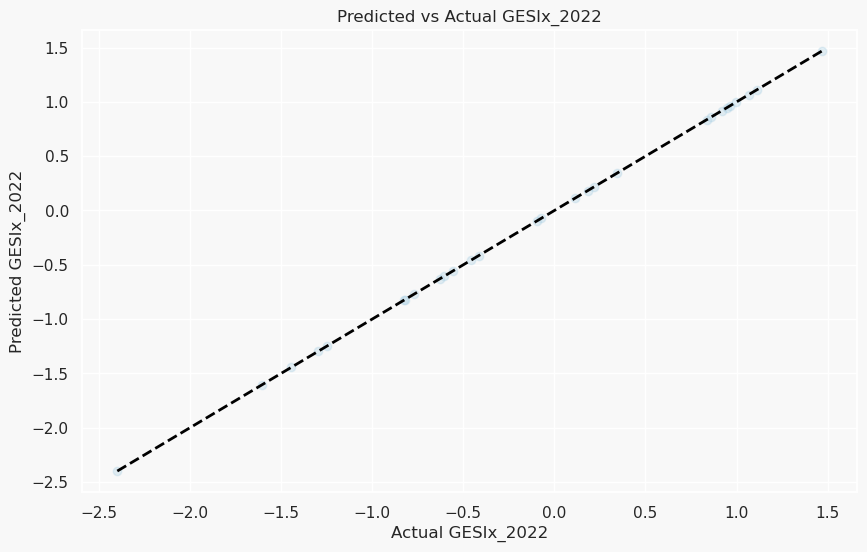

/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


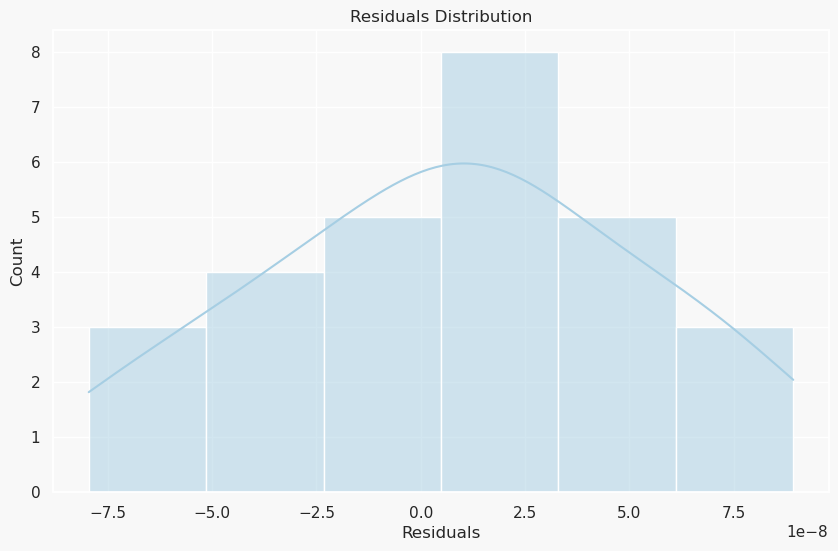

Shapiro-Wilk Test statistics=0.977, p-value=0.786
Sample looks Gaussian (fail to reject H0)


In [154]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fit an OLS model and return the summary
def fit_ols_model(X, y):
    X_const = sm.add_constant(X)  # Adding a constant to the model (intercept)
    X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)  # Splitting the data
    model = sm.OLS(y_train, X_train).fit()  # Fitting an OLS model
    return model, model.summary(), X_test, y_test

# Function to plot results and perform Shapiro-Wilk test
def plot_results(model, X_test, y_test, dependent_var_name):
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
    plt.xlabel(f'Actual {dependent_var_name}')
    plt.ylabel(f'Predicted {dependent_var_name}')
    plt.title(f'Predicted vs Actual {dependent_var_name}')
    plt.show()

    # Plot residuals distribution
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Residuals Distribution')
    plt.show()

    # Shapiro-Wilk test for normality of residuals
    stat, p_value = stats.shapiro(residuals)
    print(f'Shapiro-Wilk Test statistics={stat:.3f}, p-value={p_value:.3f}')
    alpha = 0.05  # Interpretation of the result
    if p_value > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

# Example usage with the full dataset:
# Dropping 'bzrID' and 'bzrNAME' columns from the dataset
gssa_data_dropped = gssa_data.drop(columns=['bzrID', 'bzrNAME'])

# Replace NaN values with the median of each column
imputer = SimpleImputer(strategy='median')
gssa_data_imputed = imputer.fit_transform(gssa_data_dropped)
gssa_data_imputed = pd.DataFrame(gssa_data_imputed, columns=gssa_data_dropped.columns)

# Preparing data for regression with full set of predictors
X_full = gssa_data_imputed.drop('GESIx_2022', axis=1)
y_full = gssa_data_imputed['GESIx_2022']

# Fit the model and get the summary for full predictors
model_full, summary_full, X_test_full, y_test_full = fit_ols_model(X_full, y_full)
print(summary_full)

# Plot results for full predictors
plot_results(model_full, X_test_full, y_test_full, 'GESIx_2022')



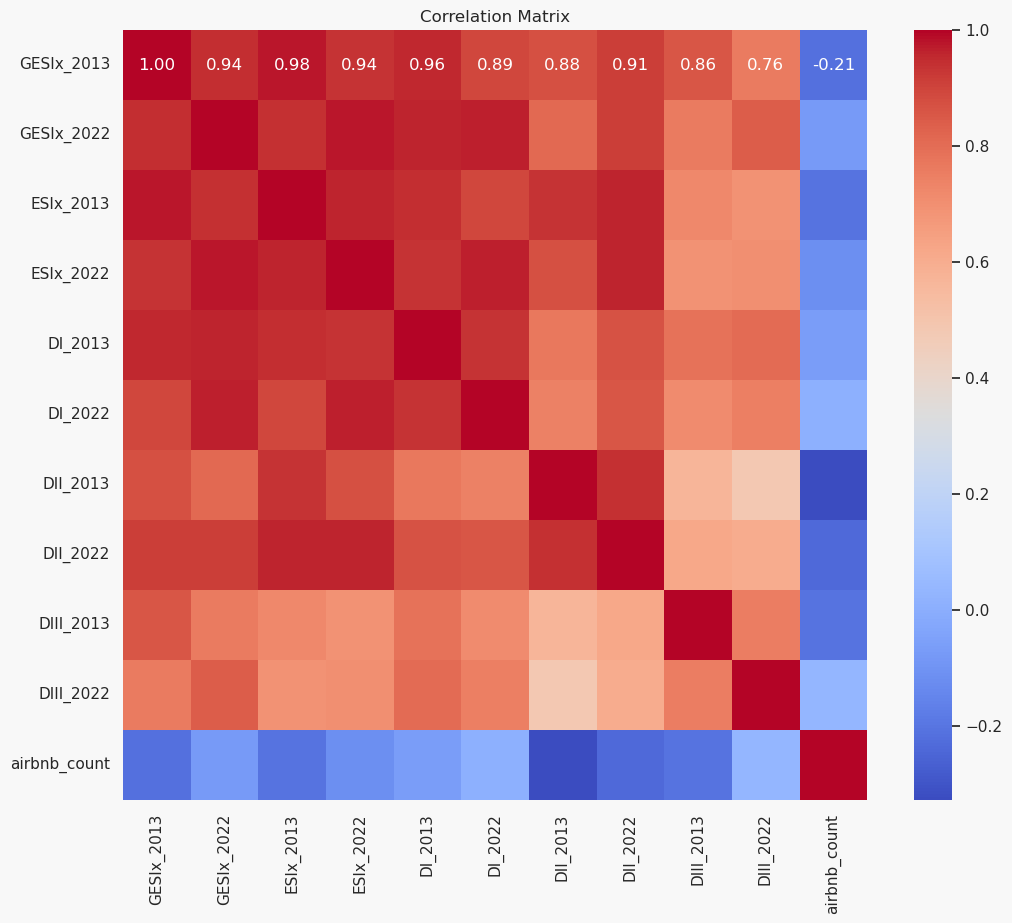

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



corr_matrix = gssa_data_imputed.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


                            OLS Regression Results                            
Dep. Variable:               DII_2022   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     29.43
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           6.36e-14
Time:                        20:03:51   Log-Likelihood:                -121.52
No. Observations:                 110   AIC:                             251.0
Df Residuals:                     106   BIC:                             261.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.089      0.947   

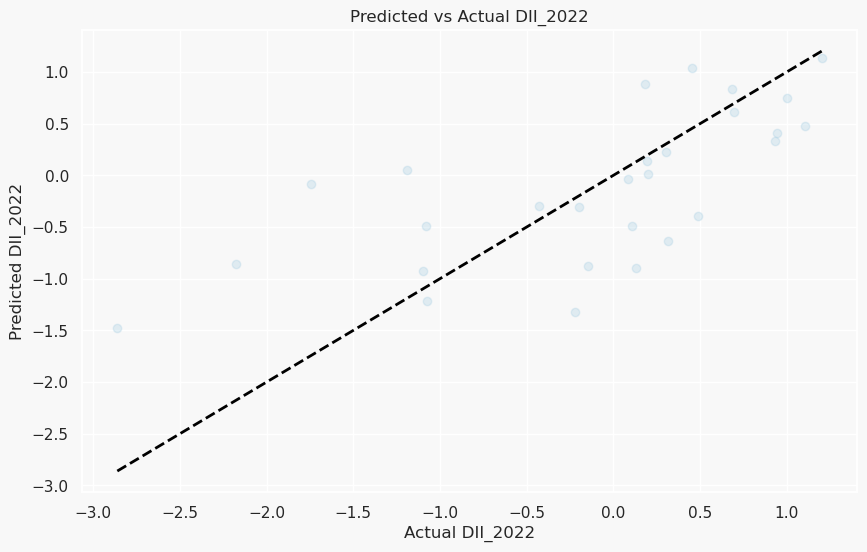

/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


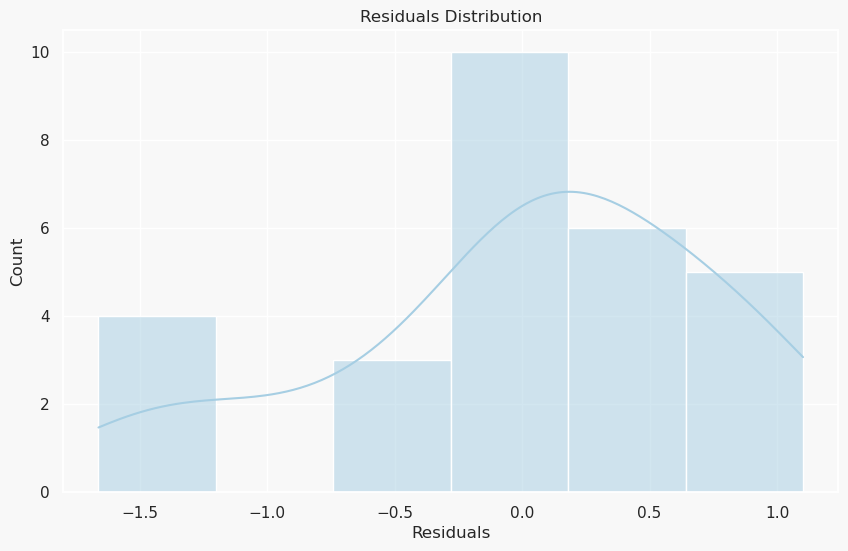

Shapiro-Wilk Test statistics=0.932, p-value=0.068
Sample looks Gaussian (fail to reject H0)


In [156]:
# Preparing data for regression with specific predictors
X_specific = gssa_data_imputed[['DIII_2013', 'DIII_2022', 'airbnb_count']]
y_specific = gssa_data_imputed['DII_2022']

# Fit the model and get the summary for specific predictors
model_specific, summary_specific, X_test_specific, y_test_specific = fit_ols_model(X_specific, y_specific)
print(summary_specific)

# Plot results for specific predictors
plot_results(model_specific, X_test_specific, y_test_specific, 'DII_2022')


                            OLS Regression Results                            
Dep. Variable:              DIII_2022   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     66.20
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           7.61e-28
Time:                        20:03:52   Log-Likelihood:                -85.235
No. Observations:                 110   AIC:                             180.5
Df Residuals:                     105   BIC:                             194.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0013      0.063     -0.021   

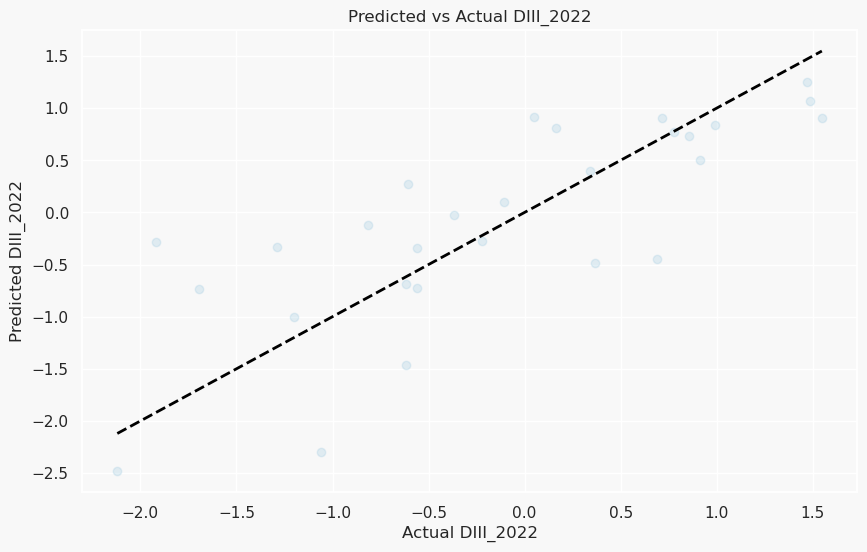

/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


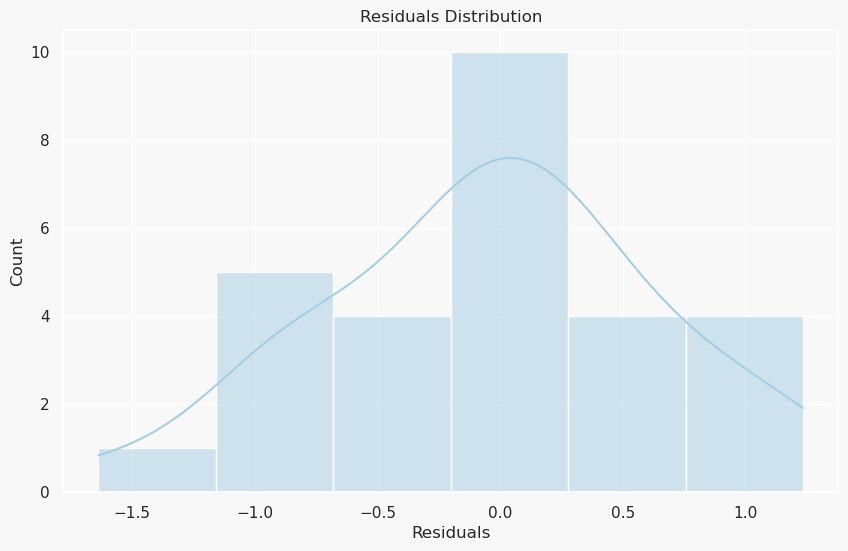

Shapiro-Wilk Test statistics=0.979, p-value=0.835
Sample looks Gaussian (fail to reject H0)


In [157]:
# Preparing data for regression with specific predictors

X_specific = gssa_data_imputed[['DII_2013', 'ESIx_2013', 'DII_2022', 'airbnb_count']]
y_specific = gssa_data_imputed['DIII_2022']

# Fit the model and get the summary for specific predictors
model_specific, summary_specific, X_test_specific, y_test_specific = fit_ols_model(X_specific, y_specific)
print(summary_specific)

# Plot results for specific predictors
plot_results(model_specific, X_test_specific, y_test_specific, 'DIII_2022')



                            OLS Regression Results                            
Dep. Variable:                DI_2022   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.42e-35
Time:                        20:03:52   Log-Likelihood:                -68.274
No. Observations:                 110   AIC:                             146.5
Df Residuals:                     105   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1465      0.055     -2.640   

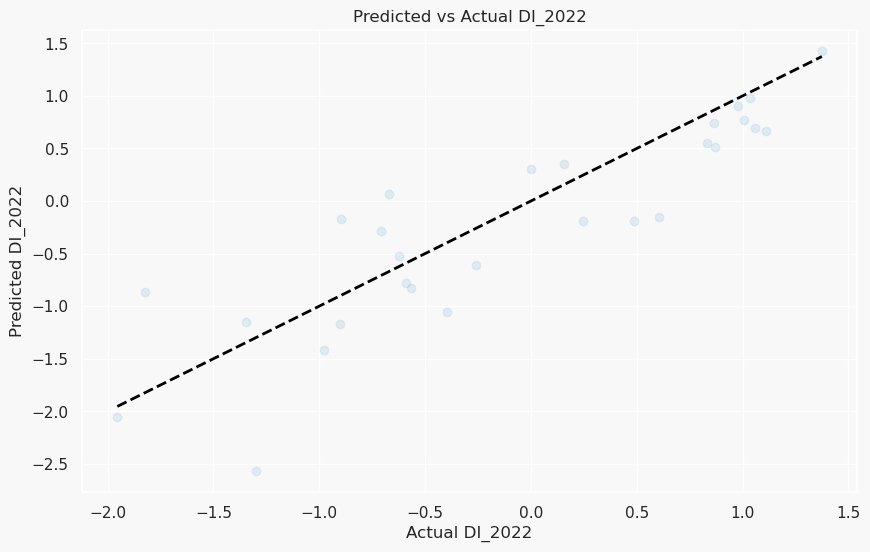

/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


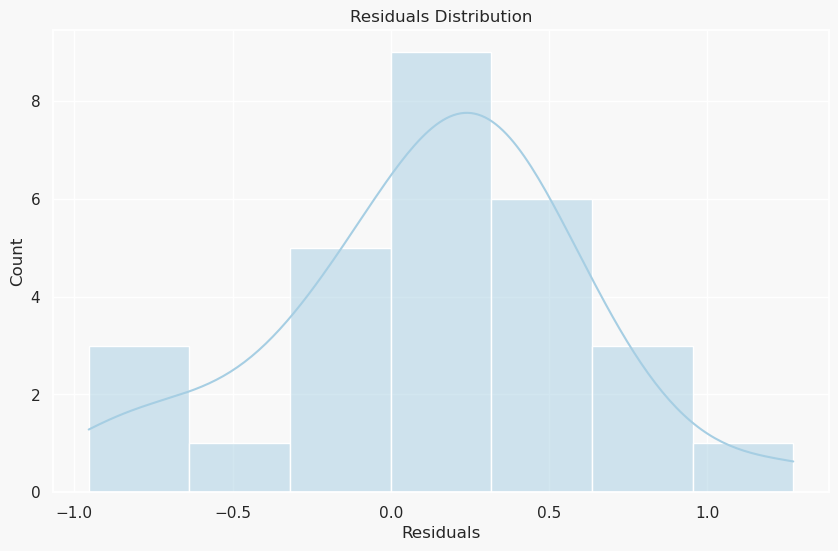

Shapiro-Wilk Test statistics=0.968, p-value=0.520
Sample looks Gaussian (fail to reject H0)


In [158]:
# Preparing data for regression with specific predictors

X_specific = gssa_data_imputed[['DIII_2013', 'DII_2013', 'DIII_2022', 'airbnb_count']]
y_specific = gssa_data_imputed['DI_2022']

# Fit the model and get the summary for specific predictors
model_specific, summary_specific, X_test_specific, y_test_specific = fit_ols_model(X_specific, y_specific)
print(summary_specific)

# Plot results for specific predictors
plot_results(model_specific, X_test_specific, y_test_specific, 'DI_2022')



                            OLS Regression Results                            
Dep. Variable:                DI_2022   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           4.52e-53
Time:                        20:03:53   Log-Likelihood:                -22.929
No. Observations:                 110   AIC:                             57.86
Df Residuals:                     104   BIC:                             74.06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0688      0.038     -1.833   

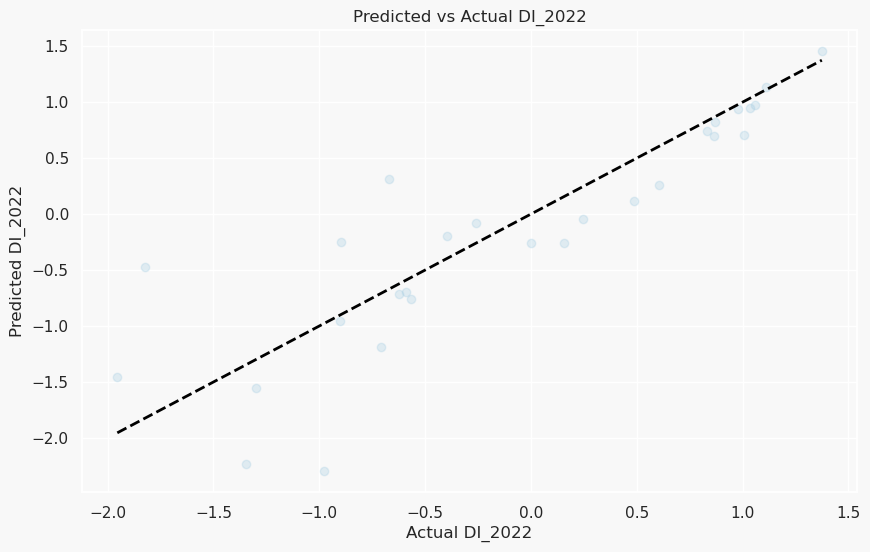

/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


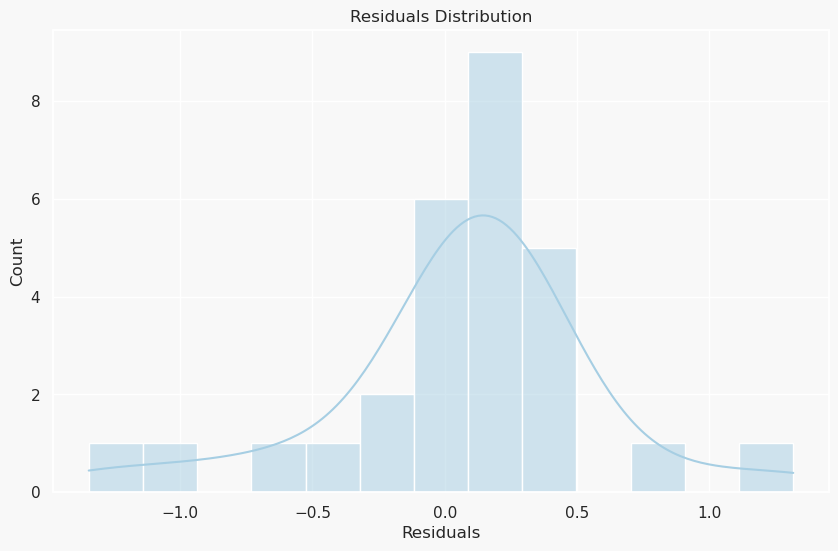

Shapiro-Wilk Test statistics=0.905, p-value=0.015
Sample does not look Gaussian (reject H0)


In [159]:
# Preparing data for regression with specific predictors

X_specific = gssa_data_imputed[['DIII_2013', 'DII_2013', 'DIII_2022', 'airbnb_count', 'ESIx_2013']]
y_specific = gssa_data_imputed['DI_2022']

# Fit the model and get the summary for specific predictors
model_specific, summary_specific, X_test_specific, y_test_specific = fit_ols_model(X_specific, y_specific)
print(summary_specific)

# Plot results for specific predictors
plot_results(model_specific, X_test_specific, y_test_specific, 'DI_2022')



No Significant Impact on Health and Social Factors:
Airbnb presence does not significantly affect public health, mortality, healthcare needs, social environment, education, and social support

Positive Influence on Employment:
Airbnb shows a significant positive impact on job market and employment conditions


In [160]:
import pandas as pd
import requests


## Data preparation

### Listings

In [161]:
listings = pd.read_csv('../data - AirBnb/listings.csv')
listings = listings[["latitude", "longitude", "name", "room_type", "neighbourhood_group", "neighbourhood",
    "price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "availability_365"]]

In [162]:
# berlin_coords = [52.51687767752022, 13.389323026028334]

# m = leafmap.Map()
# m = leafmap.Map(center=berlin_coords, zoom = 11)
# m.add_geojson("../data - AirBnb/neighbourhoods.geojson", layer_name="Neighbourhoods")
# df2 = listings[:1000]
# for _, row in df2.iterrows():
#     m.add_marker([row['latitude'], row['longitude']], radius=1)
# m

### Points of interest

In [163]:
def fetch_data_from_link(link):
    try:
        response = requests.get(link)
        if response.status_code == 200:
            json_data = response.json()
            statistics = json_data.get('statistics', {})
            foursquare_stats = statistics.get('Foursquare', {})

            return (
                foursquare_stats.get('checkinsCount', None),
                foursquare_stats.get('usersCount', None),
                foursquare_stats.get('tipCount', None),
                foursquare_stats.get('likes', None),
                json_data.get('numReviews', None)
            )
        else:
            return (f"Error: {response.status_code}",) 
    except requests.exceptions.RequestException as e:
        return (f"Error: {e}",)

poi = pd.read_csv("../data - Tourpedia/berlin-poi.csv", index_col='id')
poi = poi[poi['type'] == 'poi']
poi = poi[1:5500]
poi = poi[["lat", "lng", "name", "category", "link1"]]
poi[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = poi['link1'].apply(fetch_data_from_link).apply(pd.Series)
poi = poi.drop(columns=['link1'])
poi = poi.fillna(0)
poi.head()


,lat,lng,name,category,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
92206,52.514967298868,13.38924407959,Friedrichstraße,Road,1632.0,811.0,5.0,6.0,5.0
92217,52.51717407176,13.396604061127,Kronprinzenpalais,Monument / Landmark,43.0,35.0,0.0,1.0,0.0
92219,52.534030062626,13.418166500438,Wasserturm,Monument / Landmark,576.0,297.0,5.0,13.0,5.0
92225,52.518487500219,13.395652887479,Palais am Festungsgraben,Monument / Landmark,217.0,124.0,1.0,0.0,1.0
92227,52.540293319482,13.212606513532,Zitadelle Spandau,Monument / Landmark,1568.0,1231.0,11.0,17.0,10.0


### Restaurants

In [164]:
rst = pd.read_csv("../data - Tourpedia/berlin-restaurant.csv", index_col='id')
rst = rst[rst['category'] == 'restaurant']
rst = rst[1:4500]
rst = rst[["lat", "lng", "name", "subCategory", "details"]]
rst[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = rst['details'].apply(fetch_data_from_link).apply(pd.Series)
rst = rst.drop(columns=['details'])
rst = rst.fillna(0)
rst.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
91920,52.506011569827,13.32805032307,Hotel Savoy Berlin,Hotel,735.0,283.0,6.0,4.0,6.0
91947,52.511193329824,13.449347019196,Upstalsboom Hotel,Hotel,744.0,170.0,6.0,0.0,6.0
91956,52.500142117474,13.319578369231,Hotel Bleibtreu,Hotel,216.0,112.0,5.0,2.0,5.0
92003,52.502707245292,13.331705331802,Hotel Concorde Berlin,Hotel,2681.0,1155.0,30.0,95.0,30.0
92007,52.504889734436,13.385203007038,relexa hotel Stuttgarter Hof,Hotel,413.0,205.0,3.0,5.0,3.0


### Accomodation

In [165]:
acc = pd.read_csv("../data - Tourpedia/berlin-accommodation.csv", index_col='id')
acc = acc[acc['category'] == 'accommodation']
acc = acc[["lat", "lng", "name", "subCategory", "details"]]
acc[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = acc['details'].apply(fetch_data_from_link).apply(pd.Series)
acc = acc.drop(columns=['details'])
acc = acc.fillna(0)
acc.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
91904,52.530068167132,13.388135746622,Hotel Zarenhof Berlin-Mitte,Hotel,141,69.0,1.0,0.0,1.0
91921,52.501832343626,13.347193587317,Best Western Hotel President Berlin,Hotel,531,291.0,10.0,1.0,10.0
91934,52.501500248909,13.277047276497,Motel Avus,Hotel,75.0,48.0,0.0,0.0,0.0
91940,52.507759698801,13.328216718728,Hotel Astoria,Hotel,181,41.0,1.0,2.0,1.0
91942,52.495192803401,13.310279846191,Hotel Wittelsbach,Hotel,113,57.0,2.0,1.0,2.0


### Attractions

In [166]:
att = pd.read_csv("../data - Tourpedia/berlin-attraction.csv", skiprows=3, names = ["address", "category","id", "lat", "lng",
                                                                                    "location", "name", "unq_id", "polarity",
                                                                                    "subCategory", "details", "reviews"])
att = att[(att['category'] == 'attraction') & (att['subCategory'] != 'Hotel')]
att = att[1:6500]
att = att[["lat", "lng", "name", "subCategory", "details"]]
att[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = att['details'].apply(fetch_data_from_link).apply(pd.Series)
att = att.drop(columns=['details'])
att = att.fillna(0)
att.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
1,52.508052842516,13.426333553402,Köpi,Rock Club,183.0,97.0,3.0,9.0,3.0
4,52.541703653439,13.421982957295,Cocktail Bar X,Cocktail Bar,211.0,139.0,3.0,4.0,3.0
5,52.487675,13.351513,Pinguin Club,Bar,41.0,33.0,1.0,2.0,1.0
6,52.504698864794,13.324902694366,Gainsbourg,Bar,361.0,203.0,8.0,6.0,8.0
7,52.486752629238,13.378601074219,Golgatha,Beer Garden,1022.0,718.0,14.0,18.0,14.0


### Public transport

In [167]:
stops = pd.read_csv("../GTFS/stops.txt")
stops = stops[['stop_name', 'stop_lat', 'stop_lon']]

### Aggregating

In [168]:
import geopandas as gpd
from shapely.geometry import Point

neighborhoods_gdf = gpd.read_file('../data - AirBnb/neighbourhoods.geojson')

listings_gdf = gpd.GeoDataFrame(
    listings, 
    geometry=gpd.points_from_xy(listings['longitude'], listings['latitude'])
)

poi_gdf = gpd.GeoDataFrame(
    poi, 
    geometry=gpd.points_from_xy(poi['lng'], poi['lat'])
)

att_gdf = gpd.GeoDataFrame(
    att, 
    geometry=gpd.points_from_xy(att['lng'], att['lat'])
)

stops_gdf = gpd.GeoDataFrame(
    stops, 
    geometry=gpd.points_from_xy(stops['stop_lon'], stops['stop_lat'])
)

merged_listings = gpd.sjoin(listings_gdf, neighborhoods_gdf, op='within')
merged_poi = gpd.sjoin(poi_gdf, neighborhoods_gdf, op='within')
merged_att = gpd.sjoin(att_gdf, neighborhoods_gdf, op='within')
merged_stops = gpd.sjoin(stops_gdf, neighborhoods_gdf, op='within')

agg_listings = merged_listings.groupby('neighbourhood_left').agg({
    'price': 'mean',
    'reviews_per_month': 'mean',  
})
agg_listings = agg_listings.reset_index()
agg_listings = agg_listings.rename(columns={'neighbourhood_left': 'neighbourhood'})

agg_att = merged_att.groupby('neighbourhood').agg({
    'checkinsCount': 'sum',
    'usersCount': 'sum',
    'tipCount': 'sum',
    'likes': 'sum',
    'numReviews': 'sum',
    'neighbourhood': 'size'  
}).rename(columns={'neighbourhood': 'numRestaurants',
                    'checkinsCount': 'checkinsCount_rest',
                    'usersCount': 'usersCount_rest',
                    'tipCount': 'tipCount_rest',
                    'likes': 'likes_rest',
                    'numReviews': 'numReviews_rest'})

merged_poi = merged_poi[~merged_poi['category'].isin(['Road', 'Subway', 'Light Rail', 'Train Station'])]
agg_poi = merged_poi.groupby('neighbourhood').agg({
    'checkinsCount': 'sum',
    'usersCount': 'sum',
    'tipCount': 'sum',
    'likes': 'sum',
    'numReviews': 'sum',
    'neighbourhood': 'size'  
}).rename(columns={'neighbourhood': 'numPOIs',
                    'checkinsCount': 'checkinsCount_poi',
                    'usersCount': 'usersCount_poi',
                    'tipCount': 'tipCount_poi',
                    'likes': 'likes_poi',
                    'numReviews': 'numReviews_poi'})

agg_stops = merged_stops.groupby('neighbourhood').size().reset_index(name='num_stops')

final_df = agg_listings.merge(agg_poi, how='inner', on='neighbourhood').merge(agg_att, how='inner', on='neighbourhood').merge(agg_stops, how='inner', on='neighbourhood')

/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_5657/774139664.py:26: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_listings = gpd.sjoin(listings_gdf, neighborhoods_gdf, op='within')
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_5657/774139664.py:27: UserWarning: CRS mismatch between the CRS

In [169]:
final_df = final_df.fillna(0)
final_df.to_csv('../data - AirBnb/data_final.csv')

## Is the position or the popularity of Airbnb apartments related to Points of Interest, public transport or other features of the city?

### Random forest features importance

In [170]:
from sklearn.ensemble import RandomForestRegressor

X = final_df.drop(['neighbourhood', 'reviews_per_month', 'price'], axis=1)
y = final_df['reviews_per_month']

rf = RandomForestRegressor()
rf.fit(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
print(feature_importances.sort_values('Importance', ascending=False))


               Feature  Importance
9           likes_rest    0.179023
7      usersCount_rest    0.131352
11      numRestaurants    0.106029
6   checkinsCount_rest    0.102654
0    checkinsCount_poi    0.101592
12           num_stops    0.100472
5              numPOIs    0.082673
1       usersCount_poi    0.057355
8        tipCount_rest    0.037517
10     numReviews_rest    0.033270
3            likes_poi    0.031276
4       numReviews_poi    0.021113
2         tipCount_poi    0.015676


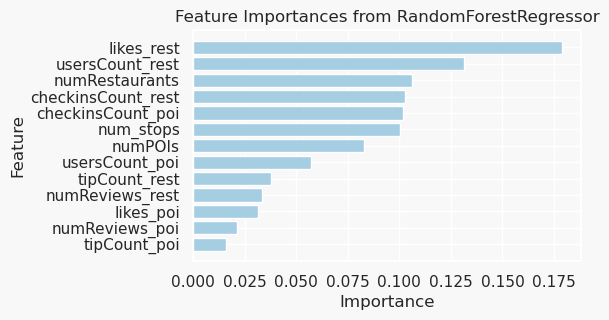

In [171]:
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is the DataFrame containing feature importances
feature_importances_sorted = feature_importances.sort_values('Importance', ascending=True)

# Bar plot of feature importances
plt.figure(figsize=(5, 3))
plt.barh(feature_importances_sorted['Feature'], feature_importances_sorted['Importance'])
plt.title('Feature Importances from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Linear model with recursive features elimination

In [172]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  

X = final_df.drop(['neighbourhood', 'reviews_per_month', 'price'], axis=1)
y = final_df['reviews_per_month']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=1)

fit = rfe.fit(X, y)

ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print(ranking.sort_values('Ranking'))


               Feature  Ranking
2         tipCount_poi        1
4       numReviews_poi        2
8        tipCount_rest        3
10     numReviews_rest        4
3            likes_poi        5
11      numRestaurants        6
5              numPOIs        7
9           likes_rest        8
12           num_stops        9
1       usersCount_poi       10
0    checkinsCount_poi       11
7      usersCount_rest       12
6   checkinsCount_rest       13


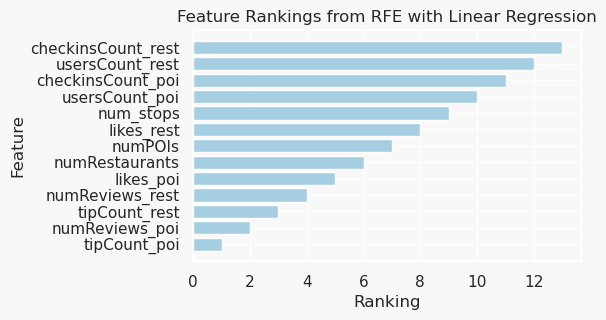

In [173]:
import matplotlib.pyplot as plt

# Assuming 'ranking' is the DataFrame containing feature rankings
ranking_sorted = ranking.sort_values('Ranking')

# Bar plot of feature rankings
plt.figure(figsize=(5, 3))
plt.barh(ranking_sorted['Feature'], ranking_sorted['Ranking'])
plt.title('Feature Rankings from RFE with Linear Regression')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.show()


### Lasso Regression

In [174]:
from sklearn.linear_model import LassoCV

X = final_df.drop(['reviews_per_month', 'neighbourhood', 'price'], axis=1)
y = final_df['reviews_per_month']

lasso_model = LassoCV()
lasso_model.fit(X, y)

lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
important_features_lasso = lasso_coefs[lasso_coefs['Coefficient'] != 0]

print(important_features_lasso)

              Feature  Coefficient
0   checkinsCount_poi    -0.000006
6  checkinsCount_rest    -0.000002
7     usersCount_rest     0.000015


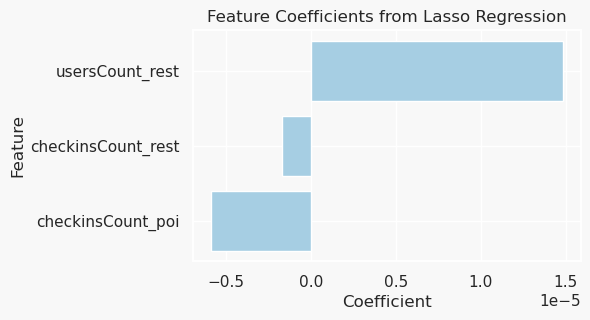

In [175]:
import matplotlib.pyplot as plt

important_features_lasso = lasso_coefs[lasso_coefs['Coefficient'] != 0]

plt.figure(figsize=(5, 3))
plt.barh(important_features_lasso['Feature'], important_features_lasso['Coefficient'])
plt.title('Feature Coefficients from Lasso Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


## How well can good locations for a new Airbnb be predicted?

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
final_df = pd.read_csv('../data - AirBnb/data_final.csv')
final_df['target_variable'] = final_df['reviews_per_month'] * final_df['price']

X = final_df.drop(['neighbourhood', 'target_variable'], axis=1)
y = final_df['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12239164)


# Fit the scaler on the training data and transform both training and test data
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

metrics_list = []


In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def plot_and_evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = X_test.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=1, label='Equality Line')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

    print(f'Mean Absolute Error: {round(mae, 2)}')
    print(f'Mean Squared Error: {round(mse, 2)}')
    print(f'Root Mean Squared Error: {round(rmse, 2)}')
    print(f'R-squared: {round(r2, 2)}')
    print(f'Adjusted R-squared: {round(adj_r2, 2)}')

    return {'mae': round(mae, 2), 'mse': round(mse, 2), 'rmse': round(rmse, 2), 'r2': round(r2, 2), 'adj_r2': round(adj_r2, 2)}

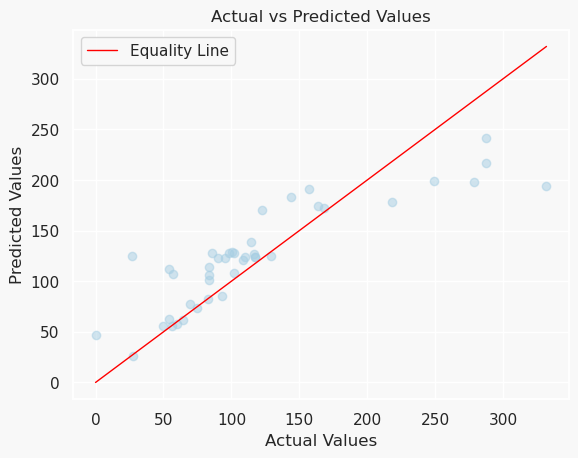

Mean Absolute Error: 28.46
Mean Squared Error: 1632.58
Root Mean Squared Error: 40.41
R-squared: 0.71
Adjusted R-squared: 0.52


In [181]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

rf_metrics = {
    'Model': 'Random Forest Regressor',
    **plot_and_evaluate(rf, X_test_scaled, y_test)
}

metrics_list.append(rf_metrics)

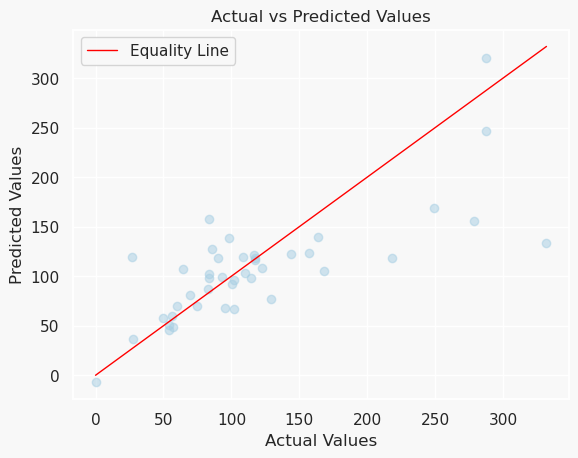

Mean Absolute Error: 31.78
Mean Squared Error: 2533.03
Root Mean Squared Error: 50.33
R-squared: 0.54
Adjusted R-squared: 0.25


In [182]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

lm_metrics = {
    'Model': 'Linear Regression',
    **plot_and_evaluate(lm, X_test, y_test)
}
metrics_list.append(lm_metrics)


/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.44933091840358, tolerance: 38.557473798013945
  model = cd_fast.enet_coordinate_descent_gram(
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.59019372669718, tolerance: 36.57349073992314
  model = cd_fast.enet_coordinate_descent_gram(
/home/christoph/miniconda3/envs/dop-ex2/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491.9939067229643, tolerance: 36.57349073992314
  model = cd_fast.enet_coordinate_descent_gram(
/home/christop

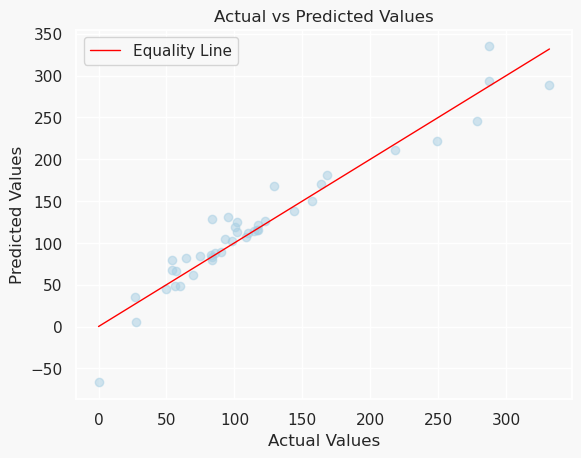

Mean Absolute Error: 14.52
Mean Squared Error: 448.55
Root Mean Squared Error: 21.18
R-squared: 0.92
Adjusted R-squared: 0.87


In [183]:
from sklearn.linear_model import LassoCV

# Assuming you've trained a Lasso Regression model named 'lasso_model'
lasso_model = LassoCV()
lasso_model.fit(X_train_scaled, y_train)

lasso_model_metrics = {
    'Model': 'Linear Regression with Lasso Regularization',
    **plot_and_evaluate(lasso_model, X_test_scaled, y_test)
}
metrics_list.append(lasso_model_metrics)

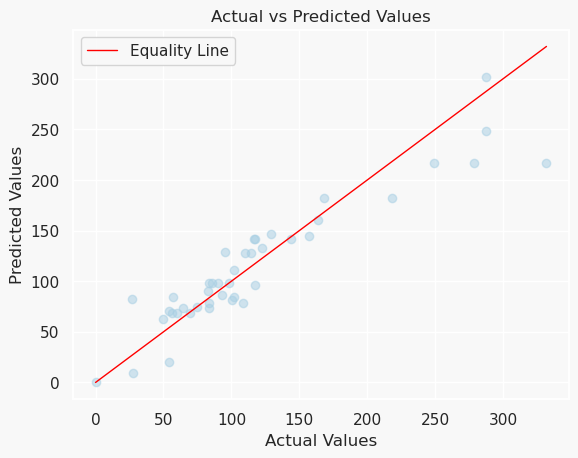

Mean Absolute Error: 19.8
Mean Squared Error: 801.95
Root Mean Squared Error: 28.32
R-squared: 0.86
Adjusted R-squared: 0.76


In [184]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

tree_model_metrics = {
    'Model': 'Decision Tree Regressor',
    **plot_and_evaluate(tree_model, X_test, y_test)
}
metrics_list.append(tree_model_metrics)


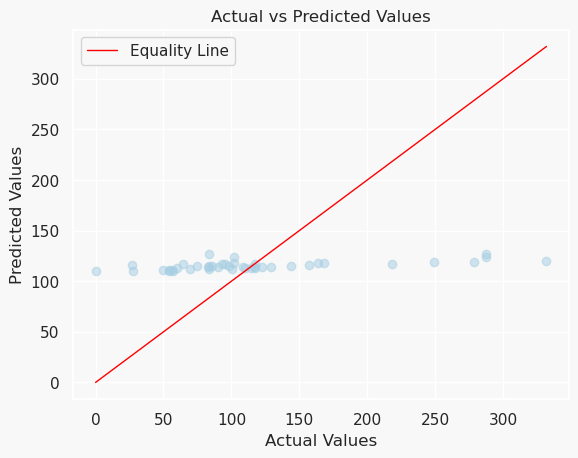

Mean Absolute Error: 52.03
Mean Squared Error: 5177.6
Root Mean Squared Error: 71.96
R-squared: 0.07
Adjusted R-squared: -0.53


In [185]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you've trained an SVR model named 'svr_model'
svr_model = SVR()

svr_model.fit(X_train_scaled, y_train)

svr_model_metrics = {
    'Model': 'Support Vectors Regressor',
    **plot_and_evaluate(svr_model, X_test_scaled, y_test)
}
metrics_list.append(svr_model_metrics)

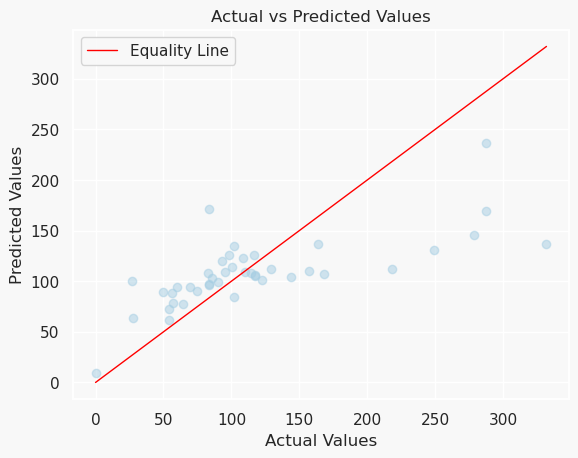

Mean Absolute Error: 38.44
Mean Squared Error: 3139.55
Root Mean Squared Error: 56.03
R-squared: 0.43
Adjusted R-squared: 0.07


In [186]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

knn_model_metrics = {
    'Model': 'KNeighbors Regressor',
    **plot_and_evaluate(knn_model, X_test_scaled, y_test)
}
metrics_list.append(knn_model_metrics)

In [187]:
evaluation_df = pd.DataFrame(metrics_list)

evaluation_df = evaluation_df.drop(columns=['Model', 'mse'], axis=1)
evaluation_df

,mae,rmse,r2,adj_r2
0,28.46,40.41,0.71,0.52
1,31.78,50.33,0.54,0.25
2,14.52,21.18,0.92,0.87
3,19.80,28.32,0.86,0.76
4,52.03,71.96,0.07,-0.53
5,38.44,56.03,0.43,0.07
